<a href="https://colab.research.google.com/github/monicasjsu/Emerging-Software-Technologies/blob/master/Assignment_2/Assignment_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Demonstrating the mixup, label smoothing, cutout  and test time Augmentation**

In [1]:
!pip install fastai

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.CIFAR)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

In [5]:
bs = 64

In [6]:
train_path = path/'train'
test_path = path/'test'

In [7]:
train_path.ls()

[PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/cat')]

In [8]:
test_path.ls()

[PosixPath('/root/.fastai/data/cifar10/test/deer'),
 PosixPath('/root/.fastai/data/cifar10/test/truck'),
 PosixPath('/root/.fastai/data/cifar10/test/ship'),
 PosixPath('/root/.fastai/data/cifar10/test/frog'),
 PosixPath('/root/.fastai/data/cifar10/test/airplane'),
 PosixPath('/root/.fastai/data/cifar10/test/horse'),
 PosixPath('/root/.fastai/data/cifar10/test/automobile'),
 PosixPath('/root/.fastai/data/cifar10/test/bird'),
 PosixPath('/root/.fastai/data/cifar10/test/dog'),
 PosixPath('/root/.fastai/data/cifar10/test/cat')]

In [9]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

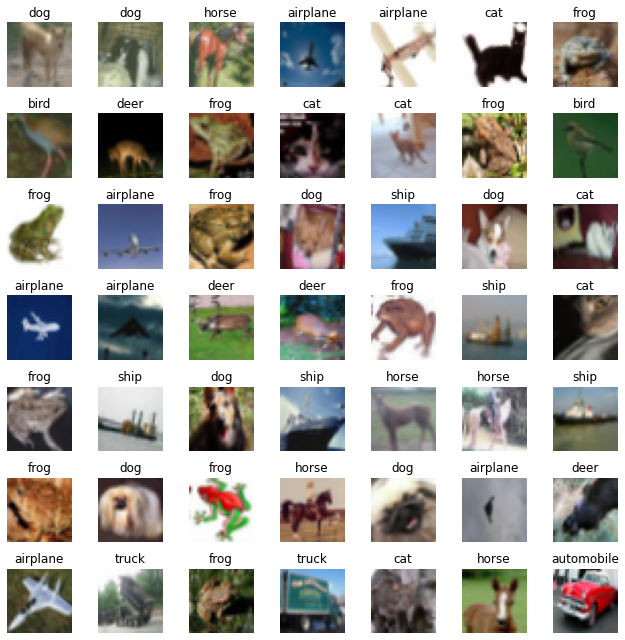

In [10]:
data.show_batch(rows=7, figsize=(9,9))

In [11]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.375202,1.151251,0.599100,01:57
1,0.951548,0.831234,0.711700,01:55
2,0.860758,0.740345,0.743300,01:55
3,0.766406,0.720616,0.753900,01:56


**Test time Augmentation**

In [12]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

0.7799999713897705

**Mixup**

In [13]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).mixup()
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.704885,1.263565,0.570300,01:56
1,1.414920,0.909025,0.699100,01:55
2,1.336419,0.853364,0.711800,01:54
3,1.273878,0.804302,0.732800,01:55


**Label Smoothing**

In [14]:
learn = create_cnn(data, models.resnet34, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.594085,1.423132,0.605000,01:54
1,1.272776,1.188960,0.701200,01:53
2,1.169228,1.107369,0.733800,01:53
3,1.124429,1.073185,0.747800,01:54


**Cutout**

In [15]:
tfms = [cutout(n_holes=(1,4), length=(8, 20), p=1.),cutout(n_holes=(1,4), length=(8,20), p=1.)]

In [16]:

data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=tfms, num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

In [17]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.792107,1.625232,0.406000,01:19
1,1.427990,1.329482,0.519100,01:20
2,1.280553,1.209533,0.569700,01:20
3,1.275763,1.197591,0.568900,01:19
